Pregnant Shark Wiggle

vonNeuman_elephant.py
    "With four parameters I can fit an elephant,
       and with five I can make him wiggle his trunk."

Original Versions:

    Author[1]: Piotr A. Zolnierczuk (zolnierczukp at ornl dot gov)
    Retrieved on 14 September 2011 from
    http://www.johndcook.com/blog/2011/06/21/how-to-fit-an-elephant/
Modified to wiggle trunk:
    2 October 2011 by David Bailey (http://www.physics.utoronto.ca/~dbailey)

    Author[2]:
    Advanced Physics Laboratory
    https://www.physics.utoronto.ca/~phy326/python/

Modified to Pregnant Shark Wiggle:
    28 October 2020 by Andreas Rony Wijaya


Based on the paper:
    "Drawing an elephant with four complex parameters", by
    Jurgen Mayer, Khaled Khairy, and Jonathon Howard,
    Am. J. Phys. 78, 648 (2010), DOI:10.1119/1.3254017

    The paper does not specify how the wiggle parameter controls the
    trunk, so a guess was made.

Inspired by John von Neumann's famous quote (above) about overfitting data.
    Attributed to von Neumann by Enrico Fermi, as quoted by
      Freeman Dyson in "A meeting with Enrico Fermi" in
      Nature 427 (22 January 2004) p. 297
      
Python Version: 3.6
Modified based on author[2]'s work
Author: Junjie Hu

Overfiting problem in trading strategy stated:
Bailey, D., Borwein, J., Lopez de Prado, M., & Zhu, Q. (2014).
Pseudo-mathematics and financial charlatanism: The effects of backtest overfitting on out-of-sample performance.

In [ ]:
import matplotlib

you might want to use the following in terminal if the graphviz does not work:
conda install -c conda-forge ffmpeg
All should be fine though if you use jupyter notebook

In [ ]:
matplotlib.use('TKAgg')
from matplotlib import animation
from numpy import append, cos, linspace, pi, sin, zeros
import matplotlib.pyplot as plt

**The Fourier Coordinate Expansion**

The coefficients come from the four input parameters

p1=70-25j, p2=-10-15j, p3=8-10j, p4=-14-60j

Then obtained the function,

fx(t)=70sin(t)-10sin(2t)+8cos(3t)-14cos(5t)

fy(t)=-60cos(t)-25sin(t)-15sin(2t)-10sin(3t)


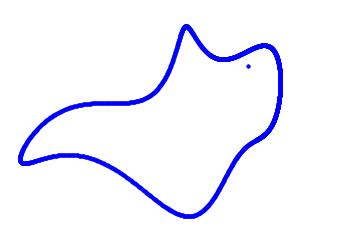

In [ ]:
# Pregnant Shark parameters
parameters = [70 - 25j, -10 - 15j, 8 - 10j, -14 - 60j, -20 + 45j]

def fourier(t, C):
    f = zeros(t.shape)
    for k in range(len(C)):
        f += C.real[k] * cos(k * t) + C.imag[k] * sin(k * t)
    return f

def shark(t, p):
    npar = 6

    Cx = zeros((npar,), dtype='complex')
    Cy = zeros((npar,), dtype='complex')

    Cx[1] = p[0].real * 1j
    Cy[1] = p[3].imag + p[0].imag * 1j

    Cx[2] = p[1].real * 1j
    Cy[2] = p[1].imag * 1j

    Cx[3] = p[2].real
    Cy[3] = p[2].imag * 1j

    Cx[5] = p[3].real

    x = append(fourier(t, Cy), [p[4].imag])
    y = -append(fourier(t, Cx), [-p[4].imag])

    return x, y

def init_plot():
    # draw the body of the shark
    x, y = shark(linspace(2 * pi + 0.9 * pi, 0.4 + 3.3 * pi, 1000), parameters)
    for ii in range(len(y) - 1):
        y[ii] -= sin(((x[ii] - x[0]) * pi / len(y))) * sin(float(0)) * parameters[4].real
    head.set_data(x, y)
    return head,

# move the head and tail
def move_head(i):
    x, y = shark(linspace(1.9 * pi + 0.9 * pi, 0.4 + 4.6 * pi, 1000), parameters)
    # move head to new position (but don't move eye stored at end or array)
    for ii in range(len(y) - 1):
        y[ii] -= sin(((x[ii] - x[0]) * pi / len(y))) * sin(float(i)) * parameters[4].real
    head.set_data(x, y)
    return head,
fig, ax = plt.subplots()

# initial the shark body
x, y = shark(t=linspace(0.4 + 1.3 * pi, 2 * pi + 0.9 * pi, 1000), p=parameters)
plt.plot(x, y, 'b.')
plt.xlim([-95, 100])
plt.ylim([-100, 100])
plt.axis('off')
head, = ax.plot([], [], 'b.')  # initialize head
ani = animation.FuncAnimation(fig=fig,
                              func=move_head,
                              frames=1000,
                              init_func=init_plot,
                              interval=500,
                              blit=False,
                              repeat=True)
plt.show()
Writer = animation.writers['ffmpeg']
metadata = dict(title='Pregnant Shark Wiggling', artist='Andreas Rony Wijaya')
writer = Writer(fps=30, metadata=metadata, bitrate=1800)
ani.save(filename='Pregnant_Shark_wiggle.mp4', writer=writer)